In [119]:
import pandas as pd

In [120]:
# choose the target model and the config groups to compare

target = "2024-04-07_18-15-53_brown-lot"
config_groups = [
    "Surrogate_Data_V1",
    "Surrogate_Data_V2",
    "Surrogate_Data_V3",
    "Surrogate_Data_V4",
    "Surrogate_Data_V5",
]
howmanymodelspergroup = 10
groups = ["0%", "25%", "50%", "75%", "100%"]

# target = "2024-05-06_11-25-19_honeydew-tough"
# config_groups = [
#     "NoAdv_Surrogate_Data_V1",
#     "NoAdv_Surrogate_Data_V2",
#     "NoAdv_Surrogate_Data_V3",
#     "NoAdv_Surrogate_Data_V4",
#     "NoAdv_Surrogate_Data_V5",
# ]
# howmanymodelspergroup = 6
# groups = ["0%", "25%", "50%", "75%", "100%"]

# target = "2024-04-07_18-15-53_brown-lot"
# config_groups = [
#     "Surrogate_SVM_V1",
#     "Surrogate_GBoost_V1",
#     "Surrogate_NaiveBayes_V1",
#     "Surrogate_LogReg_V1",
#     "Surrogate_KNN_V1",
#     "Surrogate_Data_V1",
# ]
# howmanymodelspergroup = 6
# groups = ["SVM", "GBoost", "NativeBayes", "LogReg", "KNN", "RF"]



results = pd.read_csv(f'results/target_{target}/transferability.csv')

In [121]:
# choose the metric to plot
metric = "samples_evaded_percentage"
# metric = "target_confidence_reduction_mean"

config_groups_results = []
for config_group in config_groups:
    config_group_results = results[results["config"] == config_group]
    # if more than 6, sample 6 random results
    if len(config_group_results) > howmanymodelspergroup:
        print(f"Sampling 6 random results from {config_group}")
        config_group_results = config_group_results.sample(6)
    if len(config_group_results) != howmanymodelspergroup:
        print(f"WARNING: {config_group} only has {len(config_group_results)} results")
    config_groups_results.append(config_group_results[metric].tolist())
print(config_groups_results)
print([len(group) for group in config_groups_results])

[[0.848816029143898, 0.8431372549019608, 0.8872651356993737, 0.8472998137802608, 0.8604166666666667, 0.8613445378151261, 0.8847826086956522, 0.8449197860962567, 0.8614800759013282, 0.8604060913705583], [0.8717948717948718, 0.9421052631578948, 0.9264367816091954, 0.7587253414264037, 0.9018867924528302, 0.965174129353234, 0.8417582417582418, 0.8487084870848709, 0.937219730941704, 0.8877551020408163], [0.925925925925926, 0.8765957446808511, 0.8974358974358975, 0.8523364485981308, 0.8930232558139535, 0.9072978303747534, 0.9283018867924528, 0.9244060475161988, 0.8955512572533849, 0.9527363184079602], [0.9256594724220624, 0.9281961471103328, 0.9514767932489452, 0.9644194756554308, 0.9661016949152542, 0.9675675675675676, 0.9099804305283756, 0.945010183299389, 0.8929188255613126, 0.9469548133595284], [0.9714285714285714, 0.9707602339181286, 0.90625, 0.9669421487603306, 0.948339483394834, 0.9613034623217924, 0.9593639575971732, 0.9487704918032788, 0.9457831325301204, 0.9774436090225564]]
[10, 1

Means: [0.8599868000071081, 0.8881564741620064, 0.905361061279951, 0.9398285403668201, 0.9556385090776786]
Std Devs: [0.014697079511731558, 0.05799355024240162, 0.02740508640038887, 0.0238857016374863, 0.019401022292179566]


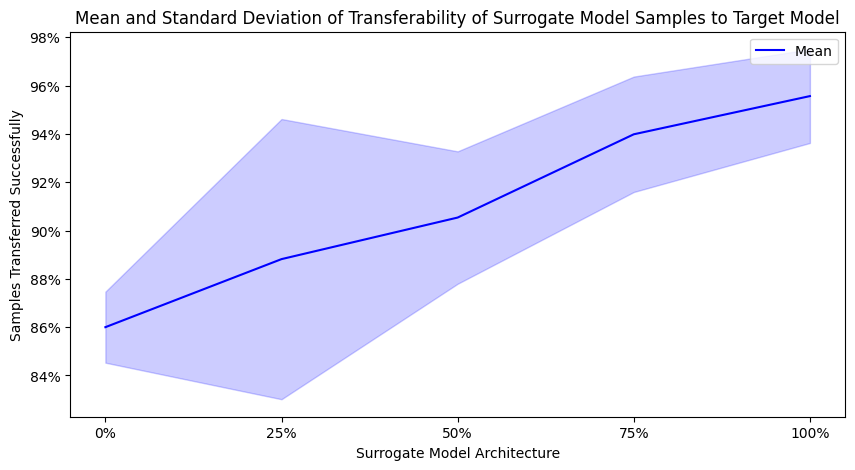

In [122]:
# chose the plot labels
title = "Mean and Standard Deviation of Transferability of Surrogate Model Samples to Target Model"
# title = "Average Target Confidence Reduction"
xlabel = "Surrogate Model Architecture"
ylabel = "Samples Transferred Successfully"
# ylabel = "Average Confidence Reduction in Target Model Predictions"


# plot the mean, std of the results with config groups on x-axis and samples_evaded_percentage on y-axis
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

data = np.array(config_groups_results)

means = [np.mean(group) for group in data]
std_devs = [np.std(group) for group in data]
print(f"Means: {means}")
print(f"Std Devs: {std_devs}")

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Mean", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()